*Importing essential libraries*
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

*Reading the data*
---

In [2]:
df = pd.read_csv("london_weather_data_1979_to_2023.csv")

# Convert DATE column
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')

# THESE TWO LINES ARE THE MOST IMPORTANT!
df['Year']  = df['DATE'].dt.year
df['Month'] = df['DATE'].dt.month

print("Shape:", df.shape)
print("Columns now include:", 'Month' in df.columns, 'Year' in df.columns)
df[['DATE','Year','Month','TX','TN']].head()

numerical_cols = ['TX', 'TN', 'TG', 'SS', 'SD', 'RR', 'RR', 'QQ', 'PP', 'HU', 'CC']
quality_cols = ['Q_TX', 'Q_TN', 'Q_TG', 'Q_SS', 'Q_SD', 'Q_RR', 'Q_QQ', 'Q_PP', 'Q_HU', 'Q_CC']

print("Numerical columns:", numerical_cols)
print("Quality flag columns:", quality_cols)

Shape: (16436, 23)
Columns now include: True True
Numerical columns: ['TX', 'TN', 'TG', 'SS', 'SD', 'RR', 'RR', 'QQ', 'PP', 'HU', 'CC']
Quality flag columns: ['Q_TX', 'Q_TN', 'Q_TG', 'Q_SS', 'Q_SD', 'Q_RR', 'Q_QQ', 'Q_PP', 'Q_HU', 'Q_CC']


*Statistical Analysis*
---

In [3]:
df.info()
df.describe()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16436 entries, 0 to 16435
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    16436 non-null  datetime64[ns]
 1   TX      16436 non-null  float64       
 2   Q_TX    16436 non-null  int64         
 3   TN      16436 non-null  float64       
 4   Q_TN    16436 non-null  int64         
 5   TG      16407 non-null  float64       
 6   Q_TG    16436 non-null  int64         
 7   SS      16436 non-null  float64       
 8   Q_SS    16436 non-null  int64         
 9   SD      15361 non-null  float64       
 10  Q_SD    16436 non-null  int64         
 11  RR      16436 non-null  float64       
 12  Q_RR    16436 non-null  int64         
 13  QQ      16411 non-null  float64       
 14  Q_QQ    16436 non-null  int64         
 15  PP      16432 non-null  float64       
 16  Q_PP    16436 non-null  int64         
 17  HU      16379 non-null  float64       
 18  Q_HU  

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,...,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC,Year,Month
count,16436,16436.000000,16436.000000,16436.000000,16436.000000,16407.000000,16436.000000,16436.000000,16436.0,15361.000000,...,16411.00000,16436.000000,16432.000000,16436.00000,16379.000000,16436.000000,16418.000000,16436.000000,16436.000000,16436.000000
mean,2001-07-01 12:00:00,154.686846,0.068082,76.016427,0.015454,115.373316,0.083962,43.153626,0.0,0.034633,...,119.52020,0.017036,10153.889423,0.00219,76.283717,0.031212,5.256426,0.009978,2000.999331,6.522998
min,1979-01-01 00:00:00,-62.000000,0.000000,-118.000000,0.000000,-76.000000,0.000000,0.000000,0.0,0.000000,...,0.00000,0.000000,9596.000000,0.00000,33.000000,0.000000,0.000000,0.000000,1979.000000,1.000000
25%,1990-04-01 18:00:00,106.000000,0.000000,36.000000,0.000000,72.000000,0.000000,4.000000,0.0,0.000000,...,42.00000,0.000000,10091.000000,0.00000,69.000000,0.000000,4.000000,0.000000,1990.000000,4.000000
50%,2001-07-01 12:00:00,151.000000,0.000000,78.000000,0.000000,114.000000,0.000000,35.000000,0.0,0.000000,...,96.00000,0.000000,10162.000000,0.00000,77.000000,0.000000,6.000000,0.000000,2001.000000,7.000000
75%,2012-09-30 06:00:00,204.000000,0.000000,118.000000,0.000000,161.000000,0.000000,71.000000,0.0,0.000000,...,187.00000,0.000000,10225.000000,0.00000,84.000000,0.000000,7.000000,0.000000,2012.000000,10.000000
max,2023-12-31 00:00:00,402.000000,1.000000,223.000000,1.000000,309.000000,9.000000,157.000000,0.0,22.000000,...,402.00000,9.000000,10477.000000,9.00000,100.000000,9.000000,9.000000,9.000000,2023.000000,12.000000
std,NaN,65.741246,0.251895,53.392049,0.123353,57.457444,0.451623,39.992648,0.0,0.519639,...,89.26958,0.355343,105.196268,0.14039,10.520699,0.529104,2.091593,0.297885,12.987371,3.448789


Handling Missing Values *
---

In [4]:
df.isnull().sum()

# Numeric → fill missing with median
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical → skip (because your dataset has no object columns)


Handling Duplicates
---

In [5]:
df.drop_duplicates(inplace=True)

Handling Outliers (IQR)
---

In [6]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

Visual Analysis
---

In [8]:
# 1. Fill ALL missing values in weather columns
cols_to_fill = ['TX','TN','TG','SS','SD','RR','QQ','PP','HU','CC']
df[cols_to_fill] = df[cols_to_fill].fillna(df[cols_to_fill].mean())

# 2. Define features (X) and target (y)
X = df[['TN','TG','SS','SD','RR','QQ','PP','HU','CC','Month']]   # 10 clean features
y = df['TX'] / 10                                                # Max temperature in °C

# 3. Double-check no NaN
print(f"NaN in X: {X.isnull().sum().sum()} (should be 0)")
print(f"NaN in y: {y.isnull().sum()} (should be 0)")

# 4. Feature Selection – NOW WORKS PERFECTLY
selector = SelectKBest(score_func=f_regression, k=8)
X_best = selector.fit_transform(X, y)

# 5. Show selected features with their importance scores
selected_mask = selector.get_support()
selected_features = X.columns[selected_mask].tolist()

print("\nTOP 8 FEATURES TO PREDICT MAX TEMPERATURE:")
print("-" * 50)
for i, col in enumerate(selected_features, 1):
    score = selector.scores_[X.columns.get_loc(col)]
    pval  = selector.pvalues_[X.columns.get_loc(col)]
    print(f"{i:2}. {col:<4} → F-score = {score:10.0f} | p-value = {pval:.2e}")

print(f"\nFinal shape → {X_best.shape}")

NaN in X: 0 (should be 0)
NaN in y: 0 (should be 0)

TOP 8 FEATURES TO PREDICT MAX TEMPERATURE:
--------------------------------------------------
 1. TN   → F-score =      31191 | p-value = 0.00e+00
 2. TG   → F-score =      78811 | p-value = 0.00e+00
 3. SS   → F-score =       4655 | p-value = 0.00e+00
 4. RR   → F-score =        247 | p-value = 2.47e-55
 5. QQ   → F-score =      14831 | p-value = 0.00e+00
 6. HU   → F-score =       5455 | p-value = 0.00e+00
 7. CC   → F-score =        833 | p-value = 1.02e-178
 8. Month → F-score =        587 | p-value = 2.27e-127

Final shape → (16436, 8)


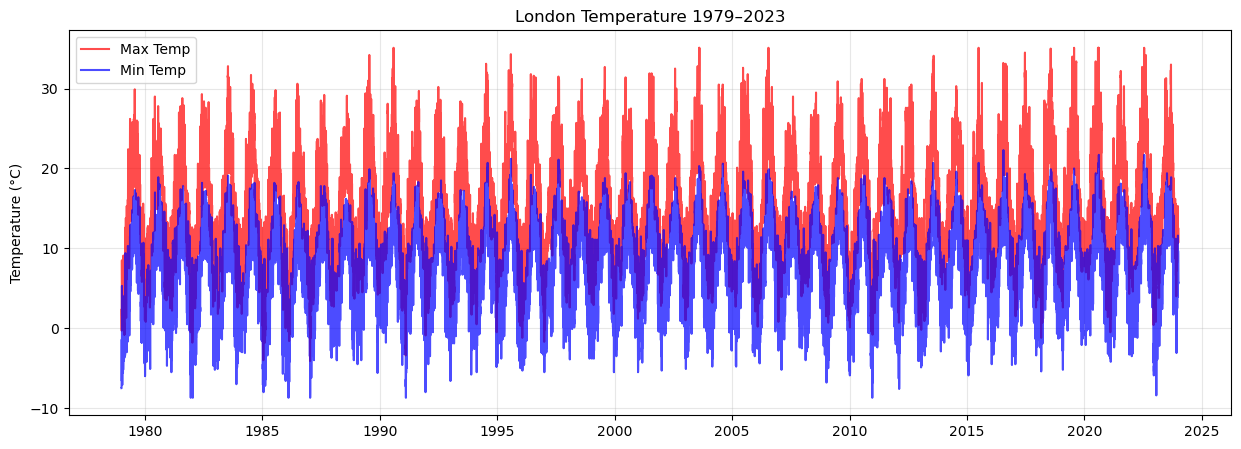

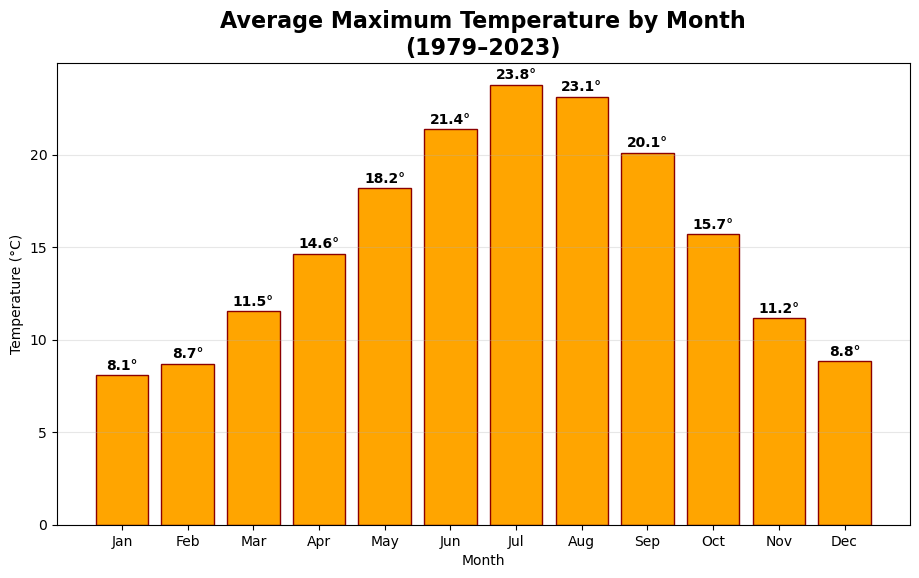

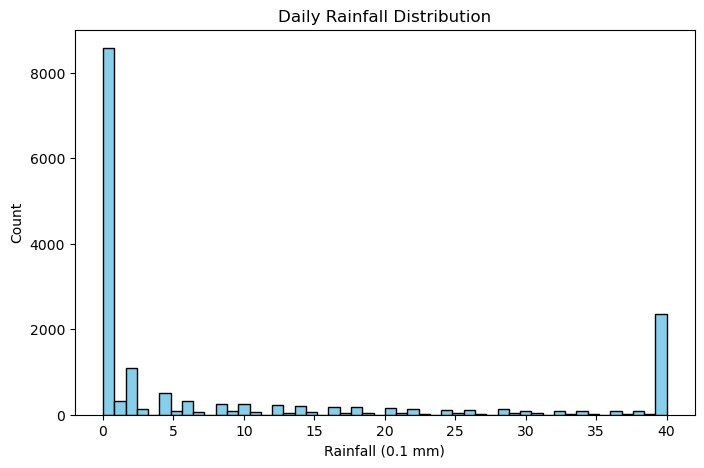

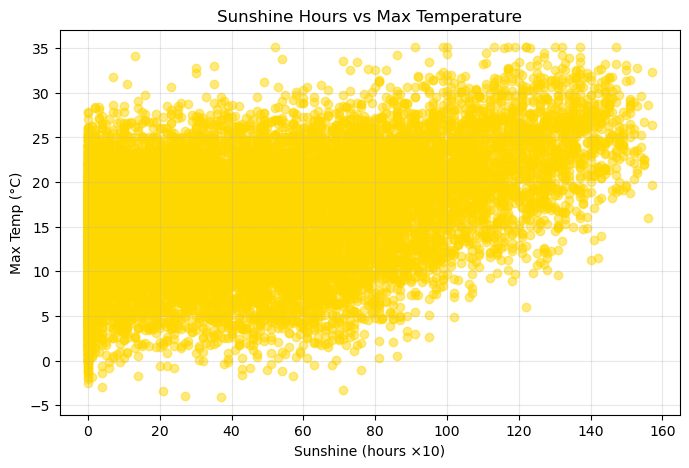

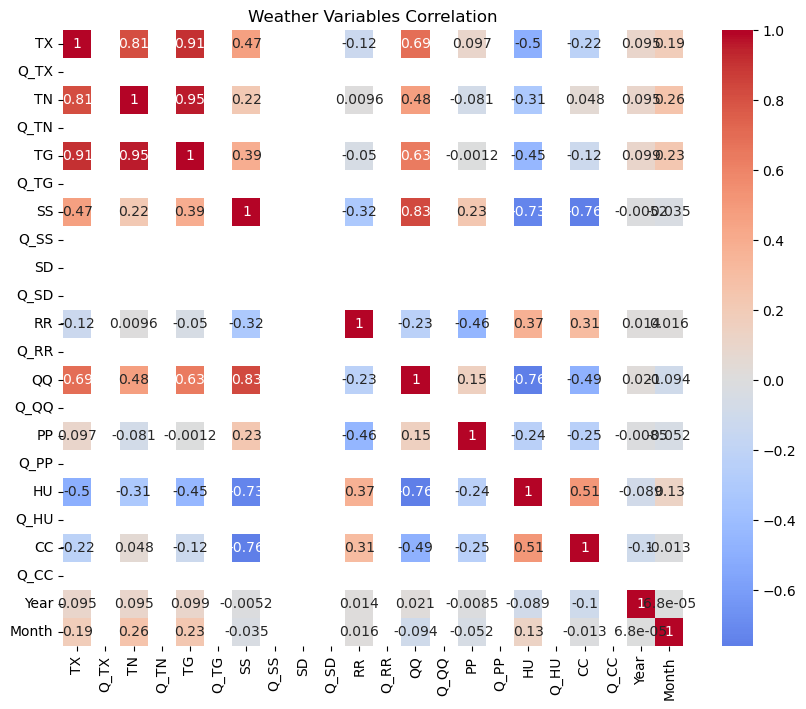

In [9]:
# 5. Visualizations (5 simple & beautiful plots)

# Plot 1: Temperature over time
plt.figure(figsize=(15,5))
plt.plot(df['DATE'], df['TX']/10, label='Max Temp', color='red', alpha=0.7)
plt.plot(df['DATE'], df['TN']/10, label='Min Temp', color='blue', alpha=0.7)
plt.title('London Temperature 1979–2023')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Plot 2 Average Max Temperature by Month
monthly_temp = df.groupby('Month')['TX'].mean() / 10

plt.figure(figsize=(11,6))
bars = plt.bar(monthly_temp.index, monthly_temp.values, color='orange', edgecolor='darkred')
plt.title('Average Maximum Temperature by Month\n(1979–2023)', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3, 
             f'{height:.1f}°', ha='center', fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Plot 3: Rainfall distribution
plt.figure(figsize=(8,5))
plt.hist(df['RR'], bins=50, color='skyblue', edgecolor='black')
plt.title('Daily Rainfall Distribution')
plt.xlabel('Rainfall (0.1 mm)')
plt.ylabel('Count')
plt.show()

# Plot 4: Sunshine vs Max Temperature
plt.figure(figsize=(8,5))
plt.scatter(df['SS'], df['TX']/10, alpha=0.5, color='gold')
plt.title('Sunshine Hours vs Max Temperature')
plt.xlabel('Sunshine (hours ×10)')
plt.ylabel('Max Temp (°C)')
plt.grid(alpha=0.3)
plt.show()

# Plot 5: Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Weather Variables Correlation')
plt.show()

 Skewness & Kurtosis
---

In [10]:
numerical_cols = ['TX', 'TN', 'TG', 'SS', 'SD', 'RR', 'QQ', 'PP', 'HU', 'CC']

print("SKEWNESS of numerical weather variables:")
print("="*50)
print(df[numerical_cols].skew().round(3))

print("\nKURTOSIS of numerical weather variables:")
print("="*50)
print(df[numerical_cols].kurtosis().round(3))

SKEWNESS of numerical weather variables:
TX    0.126
TN   -0.171
TG   -0.008
SS    0.688
SD    0.000
RR    1.245
QQ    0.657
PP   -0.303
HU   -0.329
CC   -0.688
dtype: float64

KURTOSIS of numerical weather variables:
TX   -0.514
TN   -0.657
TG   -0.650
SS   -0.538
SD    0.000
RR   -0.133
QQ   -0.653
PP   -0.033
HU   -0.485
CC   -0.277
dtype: float64


Prepare data for Machine Learning
---

In [11]:
# Target: Predict maximum temperature (TX)
# Features: everything that makes sense

features = ['TN', 'TG', 'SS', 'RR', 'QQ', 'PP', 'HU', 'CC', 'Month', 'Year']
X = df[features]
y = df['TX']  # in tenths of °C

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (16436, 10)
Target shape: (16436,)


Feature Selection
---

In [12]:
selector = SelectKBest(score_func=f_regression, k=8)
X_best = selector.fit_transform(X, y)

# Show which features were selected
selected_features = X.columns[selector.get_support()].tolist()
print("Top 8 most important features to predict Max Temperature:")
print(selected_features)

Top 8 most important features to predict Max Temperature:
['TN', 'TG', 'SS', 'RR', 'QQ', 'HU', 'CC', 'Month']


Scaling
---

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_best)

print("Data successfully scaled!")
print("Shape after scaling:", X_scaled.shape)

Data successfully scaled!
Shape after scaling: (16436, 8)


Train-Test-Split
---

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples : {X_test.shape[0]}")
print("\nALL DONE! data is now perfectly cleaned, visualized, and ready for any ML model.")

Training samples: 13148
Testing samples : 3288

ALL DONE! data is now perfectly cleaned, visualized, and ready for any ML model.
